# Tarea 0

**Nombre:** -- Víctor Manuel Mariscal Cervantes --

**Correo:** -- victor.mariscal4459@alumnos.udg.mx --

# Descenso por Gradiente Basado en Wikipedia

Este notebook implementa el algoritmo de descenso por gradiente, tal como se explica en el artículo de Wikipedia sobre [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent).

El método es un algoritmo iterativo para encontrar el mínimo de una función:

1. **Inicialización:** Se elige un punto inicial.
2. **Cálculo del Gradiente:** Se calcula el vector de derivadas parciales en el punto actual (el gradiente).
3. **Actualización:** Se actualiza el punto moviéndose en la dirección opuesta al gradiente, escalado por una tasa de aprendizaje.
4. **Convergencia:** Se repite el proceso hasta que la diferencia entre iteraciones sea menor que un umbral.

Este enfoque se utiliza aquí para minimizar distintas funciones (Rosenbrock, Himmelblau y una función cuadrática simple), permitiendo ver el comportamiento del algoritmo según la función elegida.

In [1]:
# Importación de módulos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import random

%matplotlib inline

# Definición de Funciones y sus Gradientes

Se definen tres funciones con sus correspondientes gradientes. Estas funciones son ejemplos comunes en optimización:

- **Rosenbrock:** Tiene un mínimo global en (1,1) y un valle estrecho.
- **Himmelblau:** Presenta múltiples mínimos locales.
- **Cuadrática:** Función simple cuyo mínimo es en (0,0).

Cada función se agrupa en un diccionario para permitir la selección aleatoria.

In [2]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def grad_rosenbrock(x, y):
    dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def grad_himmelblau(x, y):
    dfdx = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    dfdy = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([dfdx, dfdy])

def quadratic(x, y):
    return x**2 + y**2

def grad_quadratic(x, y):
    return np.array([2 * x, 2 * y])

functions = {
    "Rosenbrock": (rosenbrock, grad_rosenbrock),
    "Himmelblau": (himmelblau, grad_himmelblau),
    "Quadratic": (quadratic, grad_quadratic)
}

# Selección de la Función y Configuración del Descenso por Gradiente

Se selecciona aleatoriamente una función del diccionario y se define el punto inicial y los parámetros del algoritmo.

Según el artículo de Wikipedia, el algoritmo procede de la siguiente forma:

- **Inicialización:** Elegir un punto de partida aleatorio.
- **Tasa de aprendizaje:** Determina el tamaño del paso en cada iteración.
- **Iteraciones y tolerancia:** Se establecen para determinar cuándo detener el algoritmo (convergencia).


In [3]:
selected_func_name = random.choice(list(functions.keys()))
func, grad_func = functions[selected_func_name]

print(f"Función seleccionada: {selected_func_name}")

learning_rate = 0.001
max_iters = 10000
tolerance = 1e-6

if selected_func_name == "Himmelblau":
    x0 = random.uniform(-6, 6)
    y0 = random.uniform(-6, 6)
else:
    x0 = random.uniform(-2, 2)
    y0 = random.uniform(-1, 3)

x_current = np.array([x0, y0])
print(f"Punto inicial: {x_current}")

path = [x_current.copy()]

Función seleccionada: Rosenbrock
Punto inicial: [-1.81156137  1.84991541]


# Ejecución del Algoritmo de Descenso por Gradiente

Basándonos en la descripción de Wikipedia, el proceso iterativo es el siguiente:

1. **Calcular el gradiente** en el punto actual.
2. **Actualizar el punto:** Restar el producto del gradiente por la tasa de aprendizaje.
3. **Verificar convergencia:** Si la diferencia entre el nuevo y el viejo punto es menor que la tolerancia, se detiene el algoritmo.

Estos pasos se repiten hasta alcanzar la convergencia o llegar al número máximo de iteraciones.

In [4]:
for i in range(max_iters):
    grad = grad_func(x_current[0], x_current[1])
    x_new = x_current - learning_rate * grad
    path.append(x_new.copy())
    
    if np.linalg.norm(x_new - x_current) < tolerance:
        print(f"Convergencia alcanzada en la iteración {i}")
        break
    
    x_current = x_new

path = np.array(path)
print(f"Posición final: {x_current}")
print(f"Valor final: {func(x_current[0], x_current[1])}")

Posición final: [0.99078412 0.98161608]
Valor final: 8.507004544082113e-05


# Visualización de Resultados

Se grafica la función y la trayectoria del descenso para visualizar cómo el algoritmo se mueve en el espacio de parámetros, siguiendo los principios descritos en el artículo de Wikipedia.

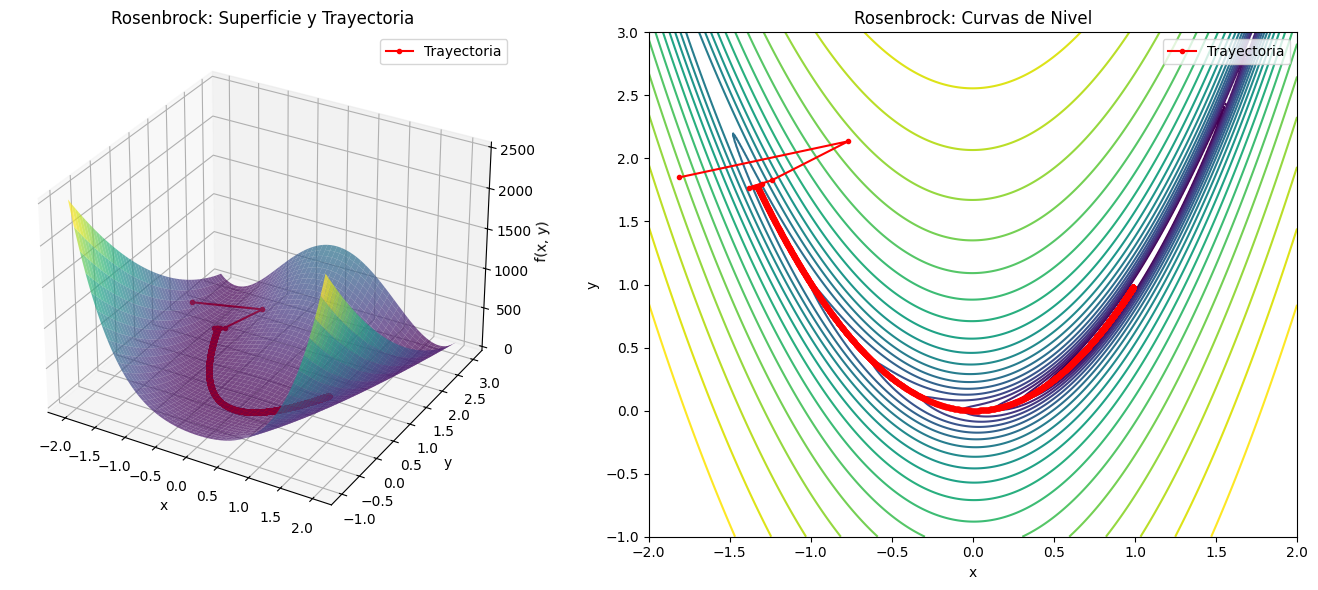

In [5]:
if selected_func_name == "Himmelblau":
    x_vals = np.linspace(-6, 6, 400)
    y_vals = np.linspace(-6, 6, 400)
else:
    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(-1, 3, 400)

X, Y = np.meshgrid(x_vals, y_vals)
Z = func(X, Y)

fig = plt.figure(figsize=(14, 6))

# Gráfico 3D: Superficie y trayectoria
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')
ax1.plot(path[:, 0], path[:, 1], func(path[:, 0], path[:, 1]),
         color='r', marker='o', markersize=3, label='Trayectoria')
ax1.set_title(f"{selected_func_name}: Superficie y Trayectoria")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.legend()

# Gráfico 2D: Curvas de nivel y trayectoria
ax2 = fig.add_subplot(1, 2, 2)
contour_levels = np.logspace(-0.5, 3, 20)
contour = ax2.contour(X, Y, Z, levels=contour_levels, norm=LogNorm(), cmap='viridis')
ax2.plot(path[:, 0], path[:, 1], color='r', marker='o', markersize=3, label='Trayectoria')
ax2.set_title(f"{selected_func_name}: Curvas de Nivel")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

plt.tight_layout()
plt.show()